<a href="https://colab.research.google.com/github/aryamangadia/Image-Recognition-AlexNet/blob/main/Image_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from sklearn.utils.multiclass import unique_labels
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1000)


In [ ]:
(x_train, y_train),(x_test, y_test)=cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=.3)

In [ ]:
print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((x_test.shape,y_test.shape))

((35000, 32, 32, 3), (35000, 1))
((15000, 32, 32, 3), (15000, 1))
((10000, 32, 32, 3), (10000, 1))


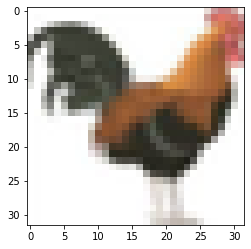

In [ ]:
plt.imshow(x_train[101],cmap='gray')
plt.show()

In [ ]:
y_train[101]

array([2], dtype=uint8)

In [ ]:
y_train=to_categorical(y_train)
y_val=to_categorical(y_val)
y_test=to_categorical(y_test)

In [ ]:
y_train[101]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((x_test.shape,y_test.shape))

((35000, 32, 32, 3), (35000, 10))
((15000, 32, 32, 3), (15000, 10))
((10000, 32, 32, 3), (10000, 10))


In [ ]:
#Data Augmentation
train_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True,zoom_range=.1 )

val_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True,zoom_range=.1)

test_generator = ImageDataGenerator(rotation_range=2, horizontal_flip= True,zoom_range=.1)

#Fitting the augmentation defined above to the data
train_generator.fit(x_train)
val_generator.fit(x_val)
test_generator.fit(x_test)

In [ ]:
batch_size= 100
epochs=30
learn_rate=.001

In [ ]:
AlexNet = Sequential()

#1st Convolutional Layer
AlexNet.add(Conv2D(filters=96, input_shape=(32,32,3), kernel_size=(11,11), strides=(4,4), padding='same'))
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))

#2nd Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1,1), padding='same'))
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))

#3rd Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(Activation('relu'))

#4th Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(Activation('relu'))

#5th Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))

#Passing it to a Fully Connected layer
AlexNet.add(Flatten())

# 1st Fully Connected Layer
AlexNet.add(Dense(4096))
AlexNet.add(Activation('relu'))
# Add Dropout to prevent overfitting
AlexNet.add(Dropout(0.2))

#2nd Fully Connected Layer
AlexNet.add(Dense(4096))
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.2))

#Output Layer
AlexNet.add(Dense(10))
AlexNet.add(Activation('softmax'))

In [ ]:
#Model Summary
AlexNet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 8, 8, 96)          34944     
                                                                 
 activation (Activation)     (None, 8, 8, 96)          0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 4, 4, 96)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 4, 4, 256)         614656    
                                                                 
 activation_1 (Activation)   (None, 4, 4, 256)         0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 2, 2, 256)        0         
 2D)                                                    

In [ ]:
AlexNet.compile(loss = keras.losses.categorical_crossentropy, optimizer= 'adam', metrics=['accuracy'])

In [ ]:
AlexNet.fit_generator(train_generator.flow(x_train, y_train, batch_size=batch_size), epochs = epochs, steps_per_epoch = x_train.shape[0]//batch_size, validation_data = val_generator.flow(x_val, y_val, batch_size=batch_size), verbose=1)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


350/350 [==============================] - 34s 58ms/step - loss: 2.2326 - accuracy: 0.1790 - val_loss: 2.0150 - val_accuracy: 0.2437
Epoch 2/30
350/350 [==============================] - 21s 59ms/step - loss: 2.0211 - accuracy: 0.2411 - val_loss: 1.9720 - val_accuracy: 0.2586
Epoch 3/30
350/350 [==============================] - 21s 59ms/step - loss: 1.9872 - accuracy: 0.2617 - val_loss: 1.9511 - val_accuracy: 0.2712
Epoch 4/30
350/350 [==============================] - 21s 60ms/step - loss: 1.9764 - accuracy: 0.2646 - val_loss: 1.9667 - val_accuracy: 0.2664
Epoch 5/30
350/350 [==============================] - 21s 59ms/step - loss: 1.9483 - accuracy: 0.2772 - val_loss: 1.9698 - val_accuracy: 0.2699
Epoch 6/30
350/350 [==============================] - 21s 59ms/step - loss: 1.9261 - accuracy: 0.2872 - val_loss: 1.9222 - val_accuracy: 0.2972
Epoch 7/30
350/350 [==============================] - 21s 59ms/step - loss: 1.9139 - accuracy: 0.2971 - val_loss: 1.8808 - val_accuracy: 0.3085
Epo

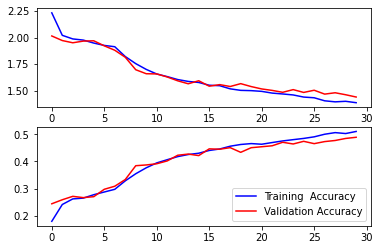

In [ ]:

f,ax=plt.subplots(2,1) 

ax[0].plot(AlexNet.history.history['loss'],color='b',label='Training Loss')
ax[0].plot(AlexNet.history.history['val_loss'],color='r',label='Validation Loss')

ax[1].plot(AlexNet.history.history['accuracy'],color='b',label='Training  Accuracy')
ax[1].plot(AlexNet.history.history['val_accuracy'],color='r',label='Validation Accuracy')

plt.legend()

In [ ]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    fig, ax = plt.subplots(figsize=(7,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

np.set_printoptions(precision=2)

In [ ]:
y_pred=AlexNet.predict(x_test)

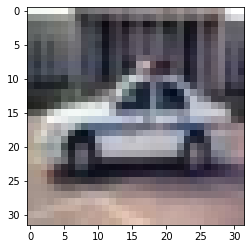

In [ ]:
plt.imshow(x_test[104],cmap='gray')
plt.show()

In [ ]:
np.argmax(y_pred[104])

1

In [ ]:
np.argmax(y_test[104])

1

Confusion matrix, without normalization


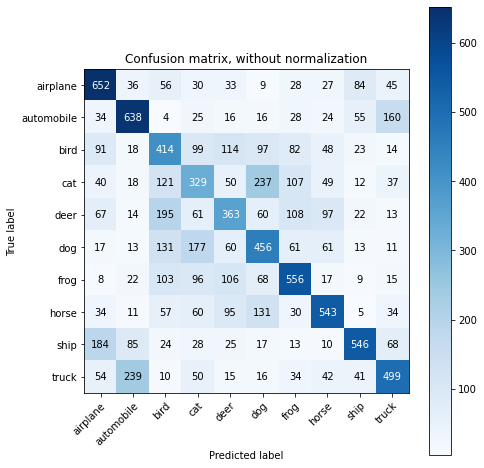

In [ ]:
y_pred=AlexNet.predict(x_test)
y_true=np.argmax(y_test,axis=1)
y_pred=np.argmax(y_pred,axis=1)

from sklearn.metrics import confusion_matrix
confusion_mtx=confusion_matrix(y_true,y_pred)

class_names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plot_confusion_matrix(y_true, y_pred, classes = class_names,title = 'Confusion matrix, without normalization')

Normalized confusion matrix


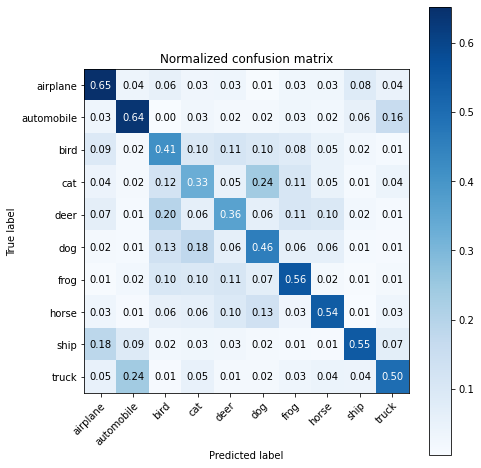

In [ ]:
plot_confusion_matrix(y_true, y_pred, classes=class_names, normalize=True, title='Normalized confusion matrix')

In [ ]:
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_true, y_pred)
print('Accuracy Score = ', acc_score)

Accuracy Score =  0.4996
